In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection  import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

# Read the data file containing Baseball Games variables

In [85]:
df=pd.read_csv('baseball_teams.csv')

In [3]:
df.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN


The goal is to build a regression model to predict Games_Won as a dependent variable

Offensice Measurements:

Runs Scored    
At Bats    
Hits    
Doubles    
Triples    
Home Runs    
Walks    
Strike Outs    
Stolen Bases    
Caught Stealing    
Hit By Pitch    
Sacrifice Fly    

Defensive Measurements

Runs Against    
Earned Runs    
Earned Run Average    
Complete Games    
Shutouts    
Saves    
Infield Put Outs    
Hits Allowed    
Home Run Allowed    
Walks Allowed    
Strikeouts Allowed    
Errors    
Double Plays    
Fielding Percentage    

Period 1 - before 1920

In [4]:
df1=df.loc['1871':'1919']

In [5]:
df1.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
1871,1983,NL,CIN,CIN,W,6,162,81.0,74,88,...,1365,135,627,934,114,121.0,0.98,Cincinnati Reds,Riverfront Stadium,1190419.0
1872,1983,AL,CLE,CLE,E,7,162,81.0,70,92,...,1531,120,529,794,122,174.0,0.98,Cleveland Indians,Cleveland Stadium,768941.0
1873,1983,AL,DET,DET,E,2,162,81.0,92,70,...,1318,170,522,875,124,142.0,0.98,Detroit Tigers,Tiger Stadium,1829636.0
1874,1983,NL,HOU,HOU,W,3,162,82.0,85,77,...,1276,94,570,904,147,165.0,0.97,Houston Astros,Astrodome,1351962.0
1875,1983,AL,KCA,KCR,W,2,163,82.0,79,83,...,1535,133,471,593,164,178.0,0.97,Kansas City Royals,Royals Stadium,1963875.0


In [6]:
df1.corr()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Attendance
Year,1.000000,0.029264,-0.301612,-0.240993,-0.025586,0.014762,0.167862,0.171318,0.103368,-0.057901,...,-0.057477,-0.102238,0.181251,0.105093,0.041118,0.030208,0.024534,0.169891,-0.074588,0.045307
Final_Standing,0.029264,1.000000,-0.260516,-0.090212,-0.788394,0.783229,-0.272764,-0.082825,-0.170514,-0.088864,...,-0.425924,-0.255427,0.366324,0.213975,0.369005,-0.151504,0.061166,0.023118,-0.158995,-0.574848
Games_Played,-0.301612,-0.260516,1.000000,0.342010,0.136190,-0.112387,0.055223,0.287851,0.144967,0.106517,...,-0.021652,0.580098,-0.033104,-0.090868,-0.042009,0.089217,0.165676,-0.042463,-0.049729,0.134032
Unnamed: 7,-0.240993,-0.090212,0.342010,1.000000,0.055370,-0.042701,-0.038817,0.058420,-0.017568,-0.064619,...,0.257009,0.216707,-0.117552,-0.031273,0.103831,-0.106259,0.095359,0.162115,-0.119866,-0.082132
Games_Won,-0.025586,-0.788394,0.136190,0.055370,1.000000,-0.999396,0.570628,0.201870,0.371789,0.214680,...,0.379519,0.260693,-0.404100,-0.161241,-0.407715,0.230199,-0.200411,-0.092839,0.259759,0.657123
Games_Lost,0.014762,0.783229,-0.112387,-0.042701,-0.999396,1.000000,-0.572191,-0.197858,-0.370887,-0.212037,...,-0.382271,-0.244369,0.402690,0.158593,0.414660,-0.228514,0.205913,0.094731,-0.260012,-0.658425
Runs_Scored,0.167862,-0.272764,0.055223,-0.038817,0.570628,-0.572191,1.000000,0.622324,0.769235,0.502340,...,-0.013007,0.048814,0.303960,0.384618,-0.155708,-0.099088,-0.165677,0.061170,0.237295,0.241053
At_Bats,0.171318,-0.082825,0.287851,0.058420,0.201870,-0.197858,0.622324,1.000000,0.903169,0.587908,...,-0.171622,0.406799,0.290384,0.226074,-0.167866,-0.114805,-0.069570,0.158545,0.086189,0.024383
Hits,0.103368,-0.170514,0.144967,-0.017568,0.371789,-0.370887,0.769235,0.903169,1.000000,0.708700,...,-0.055469,0.191211,0.302802,0.233765,-0.238626,-0.136468,-0.111251,0.157946,0.120338,0.103537
Doubles,-0.057901,-0.088864,0.106517,-0.064619,0.214680,-0.212037,0.502340,0.587908,0.708700,1.000000,...,0.001721,-0.072796,0.243199,0.344414,-0.211507,-0.146335,-0.351093,0.115875,0.321688,0.051712


In order to pick offensive and defensive fields as independent variables:
Most corralated Offensice field is Runs_Scored, 
Most corralated defensive field is Runs_Against

Based on the correlations of the variables, two independent variables (Runs_Scored and Runs_Against) are selected as candidate features
Build the first model, lm1 using the highest correlated variable as a starting point, ie Runs_Scored at r=0.57
The model is created using the time Period 1-before 1920 data set. Use the Statsmodels (smf) library with the ols (ordinary least squares) module

In [7]:
lm11 = smf.ols(formula="Games_Won ~ Runs_Scored", data=df1).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     22.69
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           1.86e-05
Time:                        16:00:13   Log-Likelihood:                -165.92
No. Observations:                  49   AIC:                             335.8
Df Residuals:                      47   BIC:                             339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.4694     11.145      2.465      0.017       5.049      49.889
Runs_Scored     0.0765      0.016      4.764      0.000       0.044       0.109
==============================================================================
Omnibus:                        2.859   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                1.517
Skew:                           0.005   Prob(JB):                        0.468
Kurtosis:                       2.138   Cond. No.                     7.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The intercept of the first model is not significant based on the p-value and the R-Squared value of 0.326 is low
Suppress the intercept in the second model iteration by specifying "-1" in the formula

In [8]:
lm11 = smf.ols(formula="Games_Won ~ Runs_Scored -1", data=df1).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              5379.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                    6.03e-51
Time:                        16:00:17   Log-Likelihood:                         -168.90
No. Observations:                  49   AIC:                                      339.8
Df Residuals:                      48   BIC:                                      341.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.1159      0.002     73.345      0.000       0.113       0.119
==============================================================================
Omnibus:                        2.768   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                1.496
Skew:                          -0.028   Prob(JB):                        0.473
Kurtosis:                       2.146   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r2 is 0.991 which is much better
The F-statistic is large which is good and the p-values for the coefficient is close to zero which means is statisically significant.
Improve the model by adding a second variable, Runs_Against

In [9]:
lm12 = smf.ols(formula="Games_Won ~ Runs_Scored + Runs_Against -1", data=df1).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              3117.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):                    1.10e-50
Time:                        19:23:21   Log-Likelihood:                         -164.80
No. Observations:                  49   AIC:                                      333.6
Df Residuals:                      47   BIC:                                      337.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Runs_Scored      0.1560      0.014     11.310      0.000       0.128       0.184
Runs_Against    -0.0400      0.014     -2.923      0.005      -0.068      -0.012
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.345
Skew:                          -0.090   Prob(JB):                        0.842
Kurtosis:                       2.631   Cond. No.                         18.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The second model has a high r2 of 0.993 and the p-values of the 2 coefficients are less than 0.05 indicating a good result

Are two independent variables approximately normally distributed?
See below analysis

In [9]:
df1_distribution = df1.loc['1871':'1919', ['Runs_Scored', 'Runs_Against']]
df1_distribution.head()

,Runs_Scored,Runs_Against
1871,623,710
1872,704,785
1873,789,679
1874,643,646
1875,696,767


In [10]:
df1_distribution.describe() 

,Runs_Scored,Runs_Against
count,49.000000,49.000000
mean,690.795918,696.755102
std,65.606142,61.496792
min,558.000000,567.000000
25%,652.000000,648.000000
50%,682.000000,696.000000
75%,738.000000,740.000000
max,829.000000,822.000000


array([[<AxesSubplot:title={'center':'Runs_Scored'}>,
        <AxesSubplot:title={'center':'Runs_Against'}>]], dtype=object)

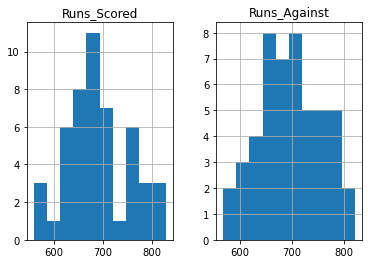

In [11]:
df1_distribution.hist()

Clearly, boht Independent variables, Runs_Scored and Runs_Against are not normally disctributed.

Period 2 - - 1920 to 1960
Repeat above exercise

In [12]:
df2 = df.loc['1920':'1960']
df2.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
1920,1985,AL,CAL,ANA,W,2,162,79.0,90,72,...,1453,171,514,767,112,202.0,0.98,California Angels,Anaheim Stadium,2567427.0
1921,1985,AL,CHA,CHW,W,3,163,81.0,85,77,...,1411,161,569,1023,111,152.0,0.98,Chicago White Sox,Comiskey Park,1669888.0
1922,1985,NL,CHN,CHC,E,4,162,81.0,77,84,...,1492,156,519,820,134,150.0,0.97,Chicago Cubs,Wrigley Field,2161534.0
1923,1985,NL,CIN,CIN,W,2,162,81.0,89,72,...,1347,131,535,910,121,142.0,0.98,Cincinnati Reds,Riverfront Stadium,1834619.0
1924,1985,AL,CLE,CLE,E,7,162,81.0,60,102,...,1556,170,547,702,141,161.0,0.97,Cleveland Indians,Cleveland Stadium,655181.0


In [13]:
df2.corr()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Attendance
Year,1.000000,0.025666,-0.014335,-0.018407,0.027412,-0.025138,0.167365,0.076586,0.134535,0.028913,...,0.059203,-0.068924,0.096933,0.172018,0.082862,0.432464,0.097011,-0.136783,-0.188406,0.046573
Final_Standing,0.025666,1.000000,-0.154908,-0.144366,-0.901320,0.899908,-0.432412,-0.076568,-0.198089,-0.235781,...,-0.627238,-0.622040,0.595947,0.337118,0.414397,-0.198072,0.247952,-0.029798,-0.174776,-0.679308
Games_Played,-0.014335,-0.154908,1.000000,0.315231,0.179894,-0.142077,0.256768,0.291178,0.173342,-0.199924,...,-0.176722,0.224721,-0.045175,0.072641,0.099329,-0.120804,0.015413,-0.040458,0.069625,0.130153
Unnamed: 7,-0.018407,-0.144366,0.315231,1.000000,0.048227,-0.034056,0.024117,-0.044687,-0.073818,0.180720,...,-0.220935,-0.079226,-0.118184,-0.137599,0.050948,-0.008211,-0.086070,-0.235312,0.233158,-0.020004
Games_Won,0.027412,-0.901320,0.179894,0.048227,1.000000,-0.999007,0.580689,0.196619,0.379950,0.294154,...,0.628950,0.622554,-0.534585,-0.251860,-0.408753,0.203452,-0.214016,0.147457,0.131477,0.720736
Games_Lost,-0.025138,0.899908,-0.142077,-0.034056,-0.999007,1.000000,-0.575316,-0.186967,-0.378399,-0.307347,...,-0.643006,-0.615640,0.531887,0.253683,0.411833,-0.208115,0.216380,-0.149558,-0.129878,-0.718285
Runs_Scored,0.167365,-0.432412,0.256768,0.024117,0.580689,-0.575316,1.000000,0.518600,0.768655,0.420965,...,0.313237,0.082507,0.125641,0.479881,-0.038880,-0.190451,-0.193712,0.360279,-0.006413,0.335666
At_Bats,0.076586,-0.076568,0.291178,-0.044687,0.196619,-0.186967,0.518600,1.000000,0.793108,0.440847,...,0.036271,0.255127,0.266289,0.183189,0.031226,-0.232040,0.290843,0.058858,-0.227090,0.112990
Hits,0.134535,-0.198089,0.173342,-0.073818,0.379950,-0.378399,0.768655,0.793108,1.000000,0.583056,...,0.224176,0.014194,0.283120,0.376169,-0.131919,-0.302165,0.114456,0.160496,-0.147890,0.179800
Doubles,0.028913,-0.235781,-0.199924,0.180720,0.294154,-0.307347,0.420965,0.440847,0.583056,1.000000,...,0.181915,-0.109127,0.211501,0.072288,-0.237411,-0.015740,-0.026613,0.106212,-0.045176,0.050987


Based on the correlations of the variables, two independent variables (Runs_Scored and Runs_Against) are selected as candidate features
Build the first model, lm1 using the highest correlated variable as a starting point, ie Runs_Scored at r=0.57
The model is created using the time Period 1-before 1920 data set. Use the Statsmodels (smf) library with the ols (ordinary least squares) module

The highest corralated variables are:
Offensive Runs Scored r=0.58
Defensive Runs Against r=-0.676

In [14]:
lm21 = smf.ols(formula="Games_Won ~ Runs_Scored", data=df2).fit()
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     19.84
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           6.88e-05
Time:                        16:01:29   Log-Likelihood:                -150.96
No. Observations:                  41   AIC:                             305.9
Df Residuals:                      39   BIC:                             309.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.4522     16.725      0.446      0.658     -26.377      41.281
Runs_Scored     0.1054      0.024      4.454      0.000       0.058       0.153
==============================================================================
Omnibus:                        0.193   Durbin-Watson:                   2.480
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.192
Skew:                           0.140   Prob(JB):                        0.909
Kurtosis:                       2.815   Cond. No.                     7.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The intercept of the first model is not significant based on the p-value and the R-Squared value of 0.337 is low
Suppress the intercept in the second model iteration by specifying "-1" in the formula

In [15]:
lm21 = smf.ols(formula="Games_Won ~ Runs_Scored -1", data=df2).fit()
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2890.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                    6.36e-39
Time:                        16:01:39   Log-Likelihood:                         -151.07
No. Observations:                  41   AIC:                                      304.1
Df Residuals:                      40   BIC:                                      305.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.1159      0.002     53.763      0.000       0.112       0.120
==============================================================================
Omnibus:                        0.170   Durbin-Watson:                   2.498
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.130
Skew:                           0.117   Prob(JB):                        0.937
Kurtosis:                       2.855   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r2 is 0.986 which is much better
Improve the model by adding a second variable, Runs_Against

In [16]:
lm22 = smf.ols(formula="Games_Won ~ Runs_Scored +Runs_Against -1", data=df2).fit()
lm22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2901.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                    3.79e-43
Time:                        16:01:49   Log-Likelihood:                         -136.41
No. Observations:                  41   AIC:                                      276.8
Df Residuals:                      39   BIC:                                      280.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Runs_Scored      0.1888      0.012     16.386      0.000       0.165       0.212
Runs_Against    -0.0735      0.012     -6.382      0.000      -0.097      -0.050
==============================================================================
Omnibus:                        0.530   Durbin-Watson:                   2.455
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.655
Skew:                          -0.219   Prob(JB):                        0.721
Kurtosis:                       2.563   Cond. No.                         15.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The second model has a high r2 of 0.993 and the p-values of the 2 coefficients are less than 0.05 indicating a good result

Are two independent variables approximately normally distributed?
See below analysis

In [17]:
df2_distribution = df2.loc['1920':'1960', ['Runs_Scored', 'Runs_Against']]
df2_distribution.head()

,Runs_Scored,Runs_Against
1920,732,703
1921,736,720
1922,686,729
1923,677,666
1924,729,861


In [18]:
df2_distribution.describe()

,Runs_Scored,Runs_Against
count,41.000000,41.000000
mean,703.804878,702.926829
std,65.855987,77.789906
min,556.000000,568.000000
25%,654.000000,666.000000
50%,705.000000,699.000000
75%,741.000000,760.000000
max,839.000000,861.000000


array([[<AxesSubplot:title={'center':'Runs_Scored'}>,
        <AxesSubplot:title={'center':'Runs_Against'}>]], dtype=object)

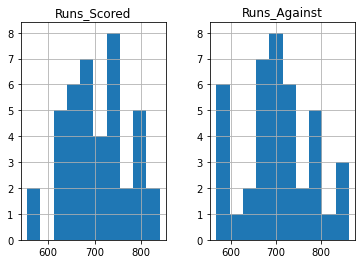

In [19]:
df2_distribution.hist()

In my opinion, boht Independent variables, Runs_Scored and Runs_Against are not normally disctributed.

Period 3 - - 1960 to 1990
Repeat above exercise

In [20]:
df3 = df.loc['1960':'1990']
df3.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
1960,1986,AL,OAK,OAK,W,3,162,83.0,76,86,...,1334,166,667,937,135,120.0,0.97,Oakland Athletics,Oakland Coliseum,1314646.0
1961,1986,NL,PHI,PHI,E,2,161,80.0,86,75,...,1473,130,553,874,137,157.0,0.97,Philadelphia Phillies,Veterans Stadium,1933335.0
1962,1986,NL,PIT,PIT,E,6,162,81.0,64,98,...,1397,138,570,924,142,134.0,0.97,Pittsburgh Pirates,Three Rivers Stadium,1000917.0
1963,1986,NL,SDN,SDP,W,4,162,81.0,74,88,...,1406,150,607,934,135,135.0,0.97,San Diego Padres,Jack Murphy Stadium,1805716.0
1964,1986,AL,SEA,SEA,W,7,162,82.0,67,95,...,1590,171,585,944,156,191.0,0.97,Seattle Mariners,Kingdome,1029045.0


In [21]:
df3.corr()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Attendance
Year,1.000000,0.035894,0.023526,-0.225902,0.077031,-0.070419,0.318604,0.224404,0.370176,0.188161,...,0.014923,-0.343310,0.371297,0.445832,-0.334618,0.101820,-0.167708,-0.160974,0.192669,0.198156
Final_Standing,0.035894,1.000000,-0.019292,0.076895,-0.817004,0.817395,-0.295254,0.048051,-0.114199,-0.142280,...,-0.370125,-0.259737,0.463500,0.390110,0.110265,-0.290612,0.182699,0.265478,-0.041380,-0.394683
Games_Played,0.023526,-0.019292,1.000000,0.322637,0.123535,-0.089874,0.286788,0.498279,0.441836,0.160652,...,-0.102632,0.217501,-0.080088,0.223789,-0.138096,0.344632,-0.111914,-0.298268,0.074790,0.057974
Unnamed: 7,-0.225902,0.076895,0.322637,1.000000,-0.224360,0.239253,-0.121747,-0.200359,-0.279449,-0.376880,...,-0.066060,-0.104322,-0.171803,0.181640,0.221510,-0.136130,0.112474,-0.040745,-0.058072,-0.281866
Games_Won,0.077031,-0.817004,0.123535,-0.224360,1.000000,-0.999281,0.584930,0.323058,0.422521,0.380425,...,0.548241,0.476271,-0.227013,-0.261981,-0.271443,0.327231,-0.249172,-0.084061,0.131689,0.499542
Games_Lost,-0.070419,0.817395,-0.089874,0.239253,-0.999281,1.000000,-0.577017,-0.311587,-0.409761,-0.378207,...,-0.556958,-0.476402,0.223072,0.272622,0.270319,-0.314845,0.251165,0.070665,-0.132407,-0.501888
Runs_Scored,0.318604,-0.295254,0.286788,-0.121747,0.584930,-0.577017,1.000000,0.647523,0.784778,0.514056,...,0.086986,0.111554,0.400080,0.401494,-0.164813,0.234442,-0.281880,0.052841,0.176509,0.162487
At_Bats,0.224404,0.048051,0.498279,-0.200359,0.323058,-0.311587,0.647523,1.000000,0.828331,0.421177,...,0.034467,0.339052,0.364987,0.274111,-0.206836,0.335625,-0.102902,-0.000615,0.036331,0.272350
Hits,0.370176,-0.114199,0.441836,-0.279449,0.422521,-0.409761,0.784778,0.828331,1.000000,0.509070,...,-0.022615,0.033298,0.406944,0.301151,-0.129326,0.386718,-0.161741,-0.087422,0.060417,0.117080
Doubles,0.188161,-0.142280,0.160652,-0.376880,0.380425,-0.378207,0.514056,0.421177,0.509070,1.000000,...,0.140430,0.199374,0.158150,-0.003310,-0.410223,0.125469,-0.032342,-0.067022,0.068362,-0.107128


The highest corralated variables are:
Offensive Runs Scored r=0.58
Defensive Saves r=0.54

In [22]:
lm31 = smf.ols(formula="Games_Won ~ Runs_Scored", data=df3).fit()
lm31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     15.08
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           0.000548
Time:                        16:02:26   Log-Likelihood:                -105.05
No. Observations:                  31   AIC:                             214.1
Df Residuals:                      29   BIC:                             217.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      21.1563     14.970      1.413      0.168      -9.461      51.774
Runs_Scored     0.0780      0.020      3.884      0.001       0.037       0.119
==============================================================================
Omnibus:                        1.958   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.752
Skew:                          -0.544   Prob(JB):                        0.416
Kurtosis:                       2.584   Cond. No.                     8.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The intercept of the first model is not significant based on the p-value and the R-Squared value of 0.342 is low
Suppress the intercept in the second model iteration by specifying "-1" in the formula

In [23]:
lm31 = smf.ols(formula="Games_Won ~ Runs_Scored - 1", data=df3).fit()
lm31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              3426.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                    1.73e-32
Time:                        16:02:29   Log-Likelihood:                         -106.08
No. Observations:                  31   AIC:                                      214.2
Df Residuals:                      30   BIC:                                      215.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.1062      0.002     58.536      0.000       0.103       0.110
==============================================================================
Omnibus:                        0.705   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.703   Jarque-Bera (JB):                0.656
Skew:                          -0.321   Prob(JB):                        0.720
Kurtosis:                       2.689   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Improve the model by adding a second variable, Saves

In [24]:
lm32 = smf.ols(formula="Games_Won ~ Runs_Scored + Saves - 1", data=df3).fit()
lm32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2842.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                    5.37e-34
Time:                        16:02:32   Log-Likelihood:                         -97.768
No. Observations:                  31   AIC:                                      199.5
Df Residuals:                      29   BIC:                                      202.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0785      0.006     12.502      0.000       0.066       0.091
Saves           0.5610      0.124      4.537      0.000       0.308       0.814
==============================================================================
Omnibus:                        0.795   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.672   Jarque-Bera (JB):                0.821
Skew:                           0.217   Prob(JB):                        0.663
Kurtosis:                       2.331   Cond. No.                         87.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The second model has a high r2 of 0.995 and the p-values of the 2 coefficients are less than 0.05 indicating a good result

Are two independent variables approximately normally distributed?
See below analysis

In [25]:
df3_distribution = df3.loc['1960':'1990', ['Runs_Scored', 'Saves']]
df3_distribution.head()

,Runs_Scored,Saves
1960,731,37
1961,739,39
1962,663,30
1963,656,32
1964,718,27


In [26]:
df3_distribution.describe()

,Runs_Scored,Saves
count,31.000000,31.000000
mean,742.580645,36.967742
std,67.394250,8.276408
min,601.000000,16.000000
25%,708.500000,32.000000
50%,741.000000,37.000000
75%,784.500000,44.000000
max,896.000000,51.000000


array([[<AxesSubplot:title={'center':'Runs_Scored'}>,
        <AxesSubplot:title={'center':'Saves'}>]], dtype=object)

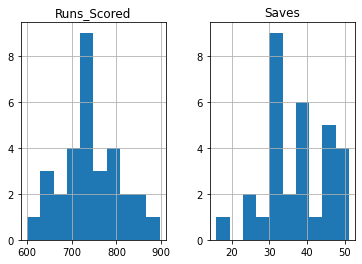

In [27]:
df3_distribution.hist()

It looks like Runs_Scored isapproximately normally distributed, however, Saves is not normally disctributed.

Period 4- - 1990 to 2010
Repeat above exercise

In [86]:
df4 = df.loc['1990':'2010']
df4.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
1990,1987,AL,SEA,SEA,W,4,162,81.0,78,84,...,1503,199,497,919,121,150.0,0.98,Seattle Mariners,Kingdome,1134255.0
1991,1987,NL,SFN,SFG,W,1,162,81.0,90,72,...,1407,146,547,1038,129,183.0,0.98,San Francisco Giants,Candlestick Park,1917168.0
1992,1987,NL,SLN,STL,E,1,162,81.0,95,67,...,1484,129,533,873,116,172.0,0.98,St. Louis Cardinals,Busch Stadium II,3072122.0
1993,1987,AL,TEX,TEX,W,6,162,81.0,75,87,...,1388,199,760,1103,148,148.0,0.97,Texas Rangers,Arlington Stadium,1763053.0
1994,1987,AL,TOR,TOR,E,2,162,81.0,96,66,...,1323,158,567,1064,111,148.0,0.98,Toronto Blue Jays,Exhibition Stadium,2778429.0


In [87]:
df4.corr()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Attendance
Year,1.000000,0.202412,-0.194743,-0.218259,-0.265371,0.252712,-0.663359,-0.357138,-0.428607,-0.317658,...,0.076523,-0.131974,-0.019709,-0.601091,-0.582424,-0.443865,0.019806,-0.364190,-0.208301,-0.072698
Final_Standing,0.202412,1.000000,-0.358872,-0.318581,-0.840717,0.845549,-0.452999,-0.169308,-0.356541,-0.399794,...,-0.511990,-0.302692,0.482280,0.215409,0.227185,-0.470364,0.487157,0.088203,-0.377557,-0.638350
Games_Played,-0.194743,-0.358872,1.000000,0.892254,0.474523,-0.441503,0.319593,0.578013,0.478889,0.308324,...,0.254880,0.425729,-0.211513,0.086788,-0.037001,0.400983,-0.230903,-0.189603,0.157137,0.254978
Unnamed: 7,-0.218259,-0.318581,0.892254,1.000000,0.462197,-0.430542,0.360959,0.522662,0.462015,0.242908,...,0.285659,0.281295,-0.080553,0.142978,0.025701,0.327523,-0.205156,-0.078541,0.176112,0.240594
Games_Won,-0.265371,-0.840717,0.474523,0.462197,1.000000,-0.998972,0.629486,0.332428,0.490907,0.467402,...,0.698134,0.355505,-0.485847,-0.069454,-0.192403,0.570183,-0.453757,-0.157628,0.304360,0.736041
Games_Lost,0.252712,0.845549,-0.441503,-0.430542,-0.998972,1.000000,-0.615964,-0.312623,-0.471514,-0.456368,...,-0.702452,-0.353813,0.493988,0.090912,0.201362,-0.564141,0.442970,0.160366,-0.294670,-0.741747
Runs_Scored,-0.663359,-0.452999,0.319593,0.360959,0.629486,-0.615964,1.000000,0.587922,0.857190,0.740671,...,0.179939,-0.017534,0.033273,0.562668,0.375354,0.550283,-0.427557,0.189551,0.283360,0.501846
At_Bats,-0.357138,-0.169308,0.578013,0.522662,0.332428,-0.312623,0.587922,1.000000,0.750110,0.649308,...,-0.007615,0.438234,0.097357,0.225881,0.227935,0.423789,-0.035488,0.075706,-0.020822,0.221604
Hits,-0.428607,-0.356541,0.478889,0.462015,0.490907,-0.471514,0.857190,0.750110,1.000000,0.892254,...,0.114611,-0.062457,0.202870,0.415494,0.140565,0.462087,-0.487864,0.013847,0.300400,0.396633
Doubles,-0.317658,-0.399794,0.308324,0.242908,0.467402,-0.456368,0.740671,0.649308,0.892254,1.000000,...,0.129158,-0.034559,0.055111,0.316038,0.028083,0.479558,-0.457394,0.019087,0.257462,0.329933


The highest corralated variables are:
Offensive Runs Scored r=0.629
Defensive Saves r=0.698

In [88]:
lm41 = smf.ols(formula="Games_Won ~ Runs_Scored", data=df4).fit()
lm41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     12.47
Date:                Sun, 01 Oct 2023   Prob (F-statistic):            0.00223
Time:                        17:47:15   Log-Likelihood:                -75.261
No. Observations:                  21   AIC:                             154.5
Df Residuals:                      19   BIC:                             156.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.8693     16.716      1.368      0.187     -12.118      57.857
Runs_Scored     0.0835      0.024      3.531      0.002       0.034       0.133
==============================================================================
Omnibus:                        0.346   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.256
Skew:                          -0.236   Prob(JB):                        0.880
Kurtosis:                       2.734   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The intercept of the first model is not significant based on the p-value and the R-Squared value of 0.396 is low
Suppress the intercept in the second model iteration by specifying "-1" in the formula

In [89]:
lm41 = smf.ols(formula="Games_Won ~ Runs_Scored - 1", data=df4).fit()
lm41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1602.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                    1.44e-20
Time:                        17:47:19   Log-Likelihood:                         -76.248
No. Observations:                  21   AIC:                                      154.5
Df Residuals:                      20   BIC:                                      155.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.1157      0.003     40.022      0.000       0.110       0.122
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.030
Skew:                           0.063   Prob(JB):                        0.985
Kurtosis:                       3.135   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Improve the model by adding a second variable, Saves

In [32]:
lm42 = smf.ols(formula="Games_Won ~ Runs_Scored + Saves - 1", data=df4).fit()
lm42.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Games_Won   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2032.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):                    6.97e-23
Time:                        16:03:11   Log-Likelihood:                         -66.014
No. Observations:                  21   AIC:                                      136.0
Df Residuals:                      19   BIC:                                      138.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Runs_Scored     0.0695      0.008      8.219      0.000       0.052       0.087
Saves           0.8416      0.150      5.600      0.000       0.527       1.156
==============================================================================
Omnibus:                        4.324   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                1.604
Skew:                           0.226   Prob(JB):                        0.449
Kurtosis:                       1.724   Cond. No.                         82.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The second model has a high r2 of 0.995 and the p-values of the 2 coefficients are less than 0.05 indicating a good result

Are two independent variables approximately normally distributed?
See below analysis

In [33]:
df4_distribution = df4.loc['1990':'2010', ['Runs_Scored', 'Saves']]
df4_distribution.head()

,Runs_Scored,Saves
1990,760,33
1991,783,38
1992,798,48
1993,823,27
1994,845,43


In [34]:
df4_distribution.describe()

,Runs_Scored,Saves
count,21.000000,21.000000
mean,701.523810,38.904762
std,86.590195,8.269853
min,550.000000,25.000000
25%,631.000000,33.000000
50%,703.000000,40.000000
75%,772.000000,43.000000
max,845.000000,52.000000


array([[<AxesSubplot:title={'center':'Runs_Scored'}>,
        <AxesSubplot:title={'center':'Saves'}>]], dtype=object)

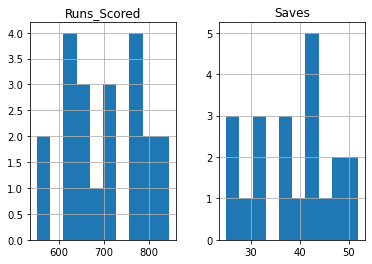

In [35]:
df4_distribution.hist()

Clearly, boht Independent variables, Runs_Scored and Saves are not normally disctributed.

Prediction

In [53]:
df.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,346,13,53,34,223,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,261,5,21,17,163,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN


In [90]:
df_prediction = df.loc['1990':'2010', ['Team_Name','Games_Won','Runs_Scored', 'Saves']]

In [91]:
df_prediction['Predicted']=lm42.predict(df_prediction)

In [92]:
df_prediction.head()

,Team_Name,Games_Won,Runs_Scored,Saves,Predicted
1990,Seattle Mariners,78,760,33,80.564845
1991,San Francisco Giants,90,783,38,86.370466
1992,St. Louis Cardinals,95,798,48,95.828337
1993,Texas Rangers,75,823,27,79.891500
1994,Toronto Blue Jays,96,845,43,94.885167
